<a href="https://colab.research.google.com/github/SushiFou/ML-Business-Case-Project/blob/main/notebooks/Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="center"><b> Machine Learning Business Case Project </b></div>
---
<div align="center">Authors : Maxime Lepeytre | Soumaya Sabry | Alexandre Zajac | Olivier Boivin | Yann Kervella


<center>
<img src="https://github.com/SushiFou/ML-Business-Case-Project/blob/main/cover_image_tech.jpg?raw=1" width="800px"/>
</center>
</div>

<div align="center"><font color='red' size='12'> DON'T FORGET TO COMMIT CHANGES ON GITHUB FOLKS ! Good luck ! <font></div>

## Context

Vous êtes consultant data scientist dans une grande entreprise de conseil
française. Votre client est une entreprise qui génère beaucoup de données
mais pour le moment aucun modèle de Machine Learning n'a été mis en
place pour les exploiter. Elle a donc naturellement fait appel à vous.

L’entreprise en question exploite plus de 3 000 magasins dans 7 pays
européens. Actuellement, les directeurs de magasin sont chargés d’estimer
leurs ventes quotidiennes jusqu'à six semaines à l'avance. Les ventes des
magasins sont influencées par de nombreux facteurs, notamment les
promotions, la concurrence, les vacances scolaires, la saisonnalité et la
localité. Avec des milliers de gestionnaires individuels prédisant les ventes
en fonction de leur situation particulière, la précision des résultats peut
être très variable.

Avec votre équipe de consultant data scientists, vous récupérez les
données disponibles et allez mener un projet complet pour les exploiter et
répondre à la problématique. Vous devez préparer et soutenir, pour le 21
janvier 2021, un rendu sous forme de slides qui tirera les conclusions de
votre travail, incluant une démonstration présentant les résultats du
modèle de Machine Learning de manière visuelle à destination des
utilisateur finaux. Vous aurez 12 minutes pour présenter votre travail à
votre donneur d’ordre client.

## Requirements


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# Graphical settings
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Amber, CB91_Purple, CB91_Green,
              CB91_Violet]
params = {"ytick.color" : "b",
          "xtick.color" : "b",
          'axes.labelsize' : 15,
          "axes.labelcolor" : "b",
          "axes.edgecolor" : "b",
          "axes.titlecolor": "b", 
          'figure.figsize': [20, 8], 
          'axes.prop_cycle': plt.cycler(color=color_list), 
          'figure.dpi' : 75, 
          'legend.fontsize': 10,
          'font.size': 15 
          }
plt.rcParams.update(params)

## Data Importation

### gdown if using colab

In [3]:
!gdown "https://drive.google.com/uc?id=1IHr_vKHZ0P0lUIAksJ9joRLUoUtZdDSY"

'gdown' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [4]:
!gdown "https://drive.google.com/uc?id=17ur-ILBNAZDgjpqgPU1XBLYSIXc5cn5d"

'gdown' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [5]:
!gdown "https://drive.google.com/uc?id=1kx5sSTcRj4aVS8KZgSCcdo9-5i1axh5n"

'gdown' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [6]:
!gdown "https://drive.google.com/uc?id=10p7JyO2DNkWbMRZoMNVPmipy1msZpBEV"

'gdown' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


## Data Exploration

In [7]:
f = open("variables.txt", "r")
print(f.read())

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Id - an Id that represents a (Store, Date) duple within the test set
Store - a unique Id for each store
Sales - the turnover for any given day
Customers - the number of customers on a given day
Open - an indicator for whether the store was open: 0 = closed, 1 = open
StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
StoreType - differentiates between 4 different store models: a, b, c, d
Assortment - describes an assortment level: a = basic, b = extra, c = extended
CompetitionDistance - distance in meters to the nearest competitor store
CompetitionOpenSince[Month/Year] - gives the approximate year and month of t

In [8]:
store_data = pd.read_csv('store.csv')
print(f'Dataframe shape : rows = {store_data.shape[0]}, columns = {store_data.shape[1]}')
store_data.head()

Dataframe shape : rows = 1115, columns = 10


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
train_data = pd.read_csv('train.csv', low_memory = False)
print(f'Dataframe shape : rows = {train_data.shape[0]}, columns = {train_data.shape[1]}')
train_data.head()

Dataframe shape : rows = 1017209, columns = 9


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Check Nan Values

In [10]:
store_data.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Only 3 Nan values in competition distance 

A lot of nan due to no competition registered for some tuples

In [11]:
train_data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [12]:
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].mean(), inplace = True)

In [13]:
store_data.fillna(-1, inplace=True)

In [14]:
store_data.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Check Outliers

In [15]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.00000
mean,558.00000,5404.901079,4.613453,1370.621525,0.512108,11.595516,1029.75157
std,322.01708,7652.849306,4.659540,935.933356,0.500078,15.925223,1006.53886
min,1.00000,20.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.00000
25%,279.50000,720.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.00000
50%,558.00000,2330.000000,4.000000,2006.000000,1.000000,1.000000,2009.00000
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.00000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.00000


Let's try to process the CompetitionDistance Outliers

In [16]:
from scipy import stats
store_data['CD_zscore'] = np.abs(stats.zscore(store_data['CompetitionDistance'].to_numpy()))
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CD_zscore
0,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,0.540551
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0.632061
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",1.140623
3,4,c,c,620.0,9.0,2009.0,0,-1.0,-1.0,-1,0.625525
4,5,a,a,29910.0,4.0,2015.0,0,-1.0,-1.0,-1,3.203525


In [17]:
store_data_cleaned = store_data[store_data['CD_zscore'] < 3]
store_data_cleaned.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,CD_zscore
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000
mean,559.150046,4725.402290,4.617566,1363.264410,0.522415,11.849039,1050.498628,0.608184
std,322.261812,5825.426321,4.683200,938.761871,0.499726,15.983167,1005.830924,0.466511
min,1.000000,20.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
25%,279.000000,700.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.349713
50%,560.000000,2280.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000,0.553650
75%,839.000000,6360.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000,0.673895
max,1115.000000,27650.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,2.908078


In [18]:
store_data = store_data_cleaned

In [19]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Sarimatata

In [20]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [21]:
combined_data = store_data.merge(train_data, on=['Store'])
type_store_a = combined_data[combined_data["StoreType"] == "a"]
type_store_a['Date'] = pd.to_datetime(type_store_a['Date'])
type_store_a = type_store_a.groupby(pd.Grouper(key='Date',freq='W-MON'))['Customers'].mean().reset_index(name='Customers')
type_store_a.set_index('Date', inplace=True)
type_store_a.head()

,Customers
Date,
2013-01-07,564.197420
2013-01-14,670.770747
2013-01-21,594.608907
2013-01-28,651.111706
2013-02-04,653.311755


In [22]:
y = type_store_a

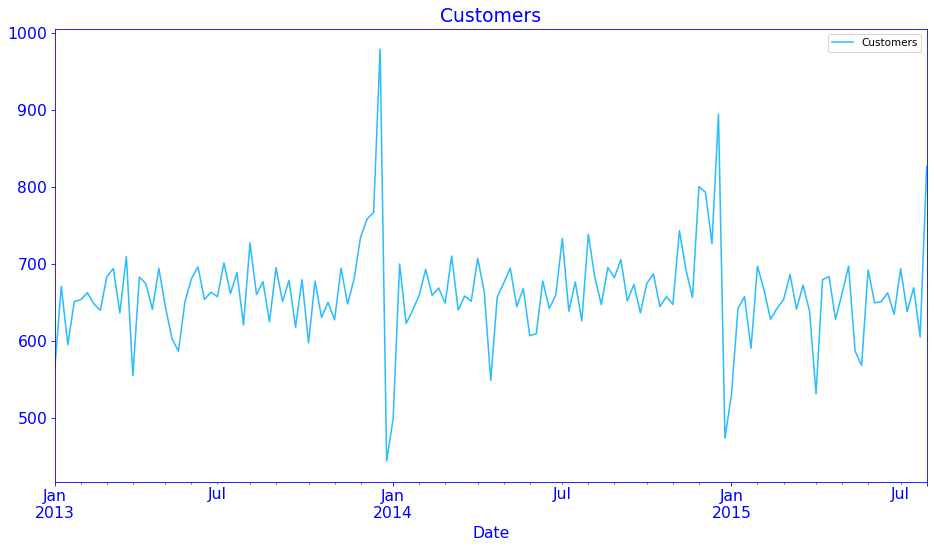

In [23]:
y.plot(figsize=(15, 8))
plt.title("Customers")
plt.show()

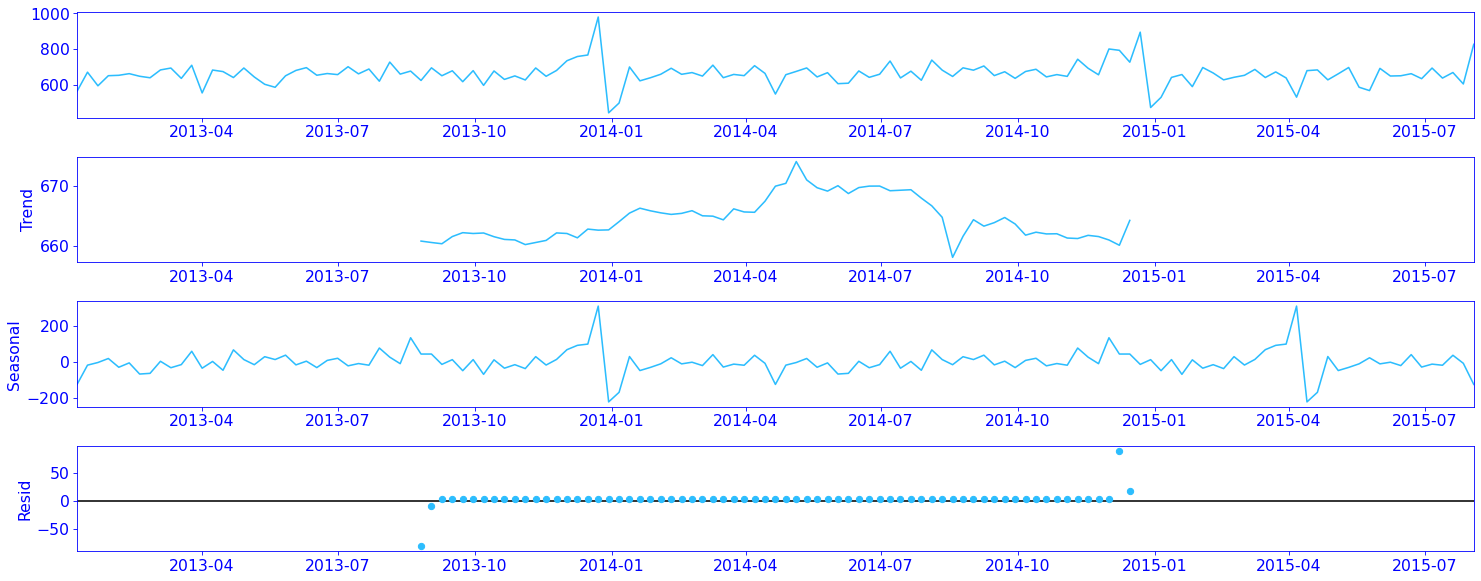

In [24]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive', period = int(len(y)/2))
fig = decomposition.plot()
plt.show()

In [25]:
g = y[:"2015-01-01"]
g.size

104

In [26]:
mod = sm.tsa.statespace.SARIMAX(y[:"2015-03-01"],
                                order=(0, 2, 2),
                                seasonal_order=(1, 2, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False, 
                                freq='W-MON')
results = mod.fit(disp=False)
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1        -15.7336   9.65e-08  -1.63e+08      0.000     -15.734     -15.734
ma.L2        -11.9121      0.000  -2.41e+04      0.000     -11.913     -11.911
ar.S.L12      -3.0352         -0        inf      0.000      -3.035      -3.035
ma.S.L12   -3.438e+13   5.14e-22  -6.69e+34      0.000   -3.44e+13   -3.44e+13
ma.S.L24   -6.214e+13         -0        inf      0.000   -6.21e+13   -6.21e+13
sigma2      4.063e+04   1.31e-17    3.1e+21      0.000    4.06e+04    4.06e+04


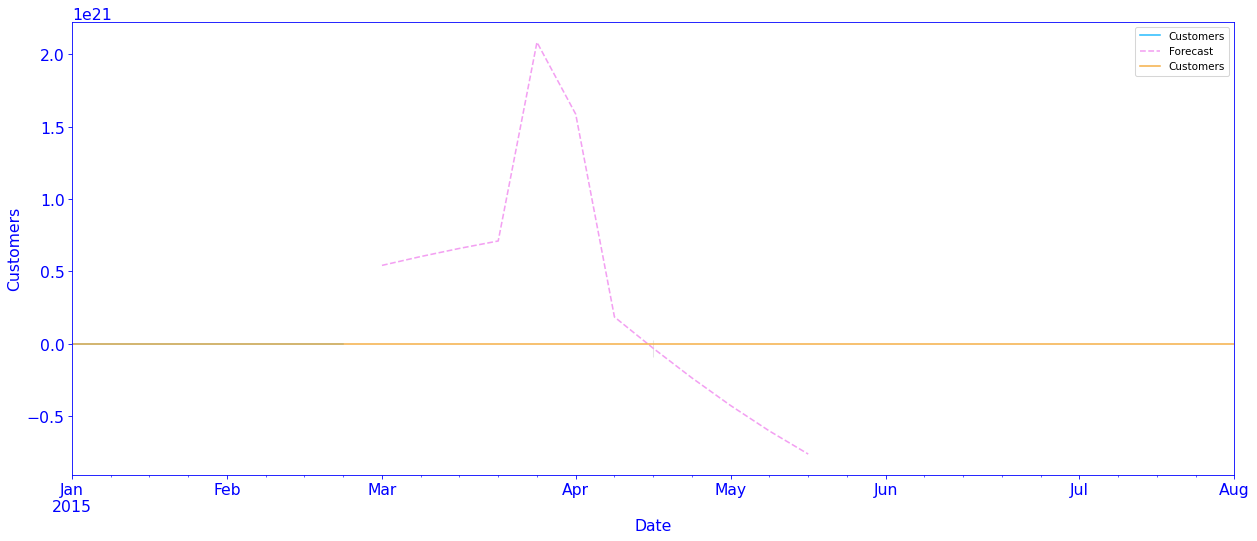

In [27]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y['2015-01-01':'2015-03-01'].plot(label='Observed', figsize=(20, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', linestyle="dashed")
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)
y['2015-01-01':].plot(label='Real value', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Customers')
plt.legend()
plt.show()

### Grid Search

In [29]:
### Import Packages ###

import itertools
import statsmodels.api as sm

### Define Parameter Ranges to Test ###

# Note: higher numbers will result in code taking much longer to run
# Here we have it set to test p,d,q each = 0, 1 & 2

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
# You'll want to change this according to your time series' frequency

pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

### Run Grid Search ###

# Define function
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50, freq='M'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts, # this is your time series you will input
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                freq='W-MON')

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.aic])
                print('SARIMAX {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
            except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['aic'],ascending=True)[0:5]
    
    return ans_df
    
### Apply function to your time series data ###

# Remember to change frequency to match your time series data
sarimax_gridsearch(y, pdq, pdqs, freq='W-MON')

SARIMAX (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =2124.420536329387
SARIMAX (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =1808.3432165355116
SARIMAX (0, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =1564.9949850769642
SARIMAX (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =1443.88004509936
SARIMAX (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =1256.7475243660258
SARIMAX (0, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =1127.3846669735924
SARIMAX (0, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =1424.6117005276735
SARIMAX (0, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =1197.906604982181
SARIMAX (0, 0, 0) x (0, 2, 2, 12)12 : AIC Calculated =1031.7992172852296
SARIMAX (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =1456.284061883884
SARIMAX (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =1393.0395976656594
SARIMAX (0, 0, 0) x (1, 0, 2, 12)12 : AIC Calculated =1263.2140632084836
SARIMAX (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =1301.1118057941997
SARIMAX (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =12

SARIMAX (0, 1, 1) x (0, 1, 2, 12)12 : AIC Calculated =1112.3977408828955
SARIMAX (0, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =1406.1319296151353
SARIMAX (0, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =1180.8886798954893
SARIMAX (0, 1, 1) x (0, 2, 2, 12)12 : AIC Calculated =1010.3712155132067
SARIMAX (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =1376.1474026021222
SARIMAX (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =1357.1730714873474
SARIMAX (0, 1, 1) x (1, 0, 2, 12)12 : AIC Calculated =1232.0149285166847
SARIMAX (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =1296.5205709090917
SARIMAX (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =1243.8639902937102
SARIMAX (0, 1, 1) x (1, 1, 2, 12)12 : AIC Calculated =1113.1228990789482
SARIMAX (0, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =1234.8374684040984
SARIMAX (0, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =1169.800738382687
SARIMAX (0, 1, 1) x (1, 2, 2, 12)12 : AIC Calculated =1012.3632013823644
SARIMAX (0, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated

SARIMAX (0, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =1347.3473092715142
SARIMAX (0, 2, 2) x (1, 0, 2, 12)12 : AIC Calculated =1230.7808462826763
SARIMAX (0, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =1297.4069087875905
SARIMAX (0, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =1230.4756690069946
SARIMAX (0, 2, 2) x (1, 1, 2, 12)12 : AIC Calculated =1103.163508154376
SARIMAX (0, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =1235.8037963800027
SARIMAX (0, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =1157.7685728181225
SARIMAX (0, 2, 2) x (1, 2, 2, 12)12 : AIC Calculated =993.2961036349515
SARIMAX (0, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =1252.1715092492889
SARIMAX (0, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =1259.760091698426
SARIMAX (0, 2, 2) x (2, 0, 2, 12)12 : AIC Calculated =1236.367160185786
SARIMAX (0, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =1147.937905220976
SARIMAX (0, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =1174.2097966063154
SARIMAX (0, 2, 2) x (2, 1, 2, 12)12 : AIC Calculated =11

SARIMAX (1, 1, 0) x (1, 2, 0, 12)12 : AIC Calculated =1261.4984699398353
SARIMAX (1, 1, 0) x (1, 2, 1, 12)12 : AIC Calculated =1216.9667982368549
SARIMAX (1, 1, 0) x (1, 2, 2, 12)12 : AIC Calculated =1061.4855665918267
SARIMAX (1, 1, 0) x (2, 0, 0, 12)12 : AIC Calculated =1284.3093259589095
SARIMAX (1, 1, 0) x (2, 0, 1, 12)12 : AIC Calculated =1286.277523249476
SARIMAX (1, 1, 0) x (2, 0, 2, 12)12 : AIC Calculated =1288.2771664156444
SARIMAX (1, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =1171.6422729631927
SARIMAX (1, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =1160.7276173108207
SARIMAX (1, 1, 0) x (2, 1, 2, 12)12 : AIC Calculated =1159.4522268076955
SARIMAX (1, 1, 0) x (2, 2, 0, 12)12 : AIC Calculated =1081.1999814112778
SARIMAX (1, 1, 0) x (2, 2, 1, 12)12 : AIC Calculated =1063.7286065574672
SARIMAX (1, 1, 0) x (2, 2, 2, 12)12 : AIC Calculated =1063.2647184971438
SARIMAX (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =1482.2556124428552
SARIMAX (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated

SARIMAX (1, 2, 1) x (2, 0, 2, 12)12 : AIC Calculated =1271.9412045308507
SARIMAX (1, 2, 1) x (2, 1, 0, 12)12 : AIC Calculated =1166.9917992447758
SARIMAX (1, 2, 1) x (2, 1, 1, 12)12 : AIC Calculated =1157.51580758217
SARIMAX (1, 2, 1) x (2, 1, 2, 12)12 : AIC Calculated =1145.3242755744154
SARIMAX (1, 2, 1) x (2, 2, 0, 12)12 : AIC Calculated =1076.2804732636557
SARIMAX (1, 2, 1) x (2, 2, 1, 12)12 : AIC Calculated =1060.4520701414326
SARIMAX (1, 2, 1) x (2, 2, 2, 12)12 : AIC Calculated =1038.9947210425128
SARIMAX (1, 2, 2) x (0, 0, 0, 12)12 : AIC Calculated =1473.0178729786087
SARIMAX (1, 2, 2) x (0, 0, 1, 12)12 : AIC Calculated =1347.322916011983
SARIMAX (1, 2, 2) x (0, 0, 2, 12)12 : AIC Calculated =1223.0591815646803
SARIMAX (1, 2, 2) x (0, 1, 0, 12)12 : AIC Calculated =1417.7097717517806
SARIMAX (1, 2, 2) x (0, 1, 1, 12)12 : AIC Calculated =1230.3064987238686
SARIMAX (1, 2, 2) x (0, 1, 2, 12)12 : AIC Calculated =1104.580854518298
SARIMAX (1, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =1

SARIMAX (2, 0, 2) x (2, 2, 1, 12)12 : AIC Calculated =1029.0181273023009
SARIMAX (2, 0, 2) x (2, 2, 2, 12)12 : AIC Calculated =1017.2771717229529
SARIMAX (2, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =1514.8119994482656
SARIMAX (2, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =1396.110680241196
SARIMAX (2, 1, 0) x (0, 0, 2, 12)12 : AIC Calculated =1268.8113595191003
SARIMAX (2, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =1456.6996807436826
SARIMAX (2, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =1278.2794957272865
SARIMAX (2, 1, 0) x (0, 1, 2, 12)12 : AIC Calculated =1143.3619648232443
SARIMAX (2, 1, 0) x (0, 2, 0, 12)12 : AIC Calculated =1433.2918221986872
SARIMAX (2, 1, 0) x (0, 2, 1, 12)12 : AIC Calculated =1215.4482791308906
SARIMAX (2, 1, 0) x (0, 2, 2, 12)12 : AIC Calculated =1046.2801578455874
SARIMAX (2, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =1385.5523166324801
SARIMAX (2, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =1387.5517788026282
SARIMAX (2, 1, 0) x (1, 0, 2, 12)12 : AIC Calculated

SARIMAX (2, 2, 1) x (0, 1, 0, 12)12 : AIC Calculated =1451.787439320143
SARIMAX (2, 2, 1) x (0, 1, 1, 12)12 : AIC Calculated =1263.130906736827
SARIMAX (2, 2, 1) x (0, 1, 2, 12)12 : AIC Calculated =1128.1540915921682
SARIMAX (2, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =1427.2631797807826
SARIMAX (2, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =1198.3891177162066
SARIMAX (2, 2, 1) x (0, 2, 2, 12)12 : AIC Calculated =1022.8358667382923
SARIMAX (2, 2, 1) x (1, 0, 0, 12)12 : AIC Calculated =1380.9563546412687
SARIMAX (2, 2, 1) x (1, 0, 1, 12)12 : AIC Calculated =1382.9322445247735
SARIMAX (2, 2, 1) x (1, 0, 2, 12)12 : AIC Calculated =1254.8020317517833
SARIMAX (2, 2, 1) x (1, 1, 0, 12)12 : AIC Calculated =1291.4225646592108
SARIMAX (2, 2, 1) x (1, 1, 1, 12)12 : AIC Calculated =1265.0937383130172
SARIMAX (2, 2, 1) x (1, 1, 2, 12)12 : AIC Calculated =1128.813109873229
SARIMAX (2, 2, 1) x (1, 2, 0, 12)12 : AIC Calculated =1224.080166253163
SARIMAX (2, 2, 1) x (1, 2, 1, 12)12 : AIC Calculated =1

,pdq,pdqs,aic
224,"(0, 2, 2)","(0, 2, 2, 12)",990.198121
233,"(0, 2, 2)","(1, 2, 2, 12)",993.296104
242,"(0, 2, 2)","(2, 2, 2, 12)",996.289295
143,"(0, 1, 2)","(0, 2, 2, 12)",998.487397
467,"(1, 2, 2)","(0, 2, 2, 12)",999.320135


224	(0, 2, 2)	(0, 2, 2, 12)	1002.231717
233	(0, 2, 2)	(1, 2, 2, 12)	1007.736419
143	(0, 1, 2)	(0, 2, 2, 12)	1010.581600
242	(0, 2, 2)	(2, 2, 2, 12)	1013.136330
467	(1, 2, 2)	(0, 2, 2, 12)	1013.760450